<a href="https://colab.research.google.com/github/NurFortuna/Deep_Learning_with_Tensorflow_notes/blob/main/classify_MNIST_using_a_simple_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install grpcio==1.24.3
!pip install tensorflow==2.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.2 MB/s eta 0:00:00
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.51.1
    Uninstalling grpcio-1.51.1:
      Successfully uninstalled grpcio-1.51.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.48.2 requires grpcio>=1.48.2, but you have grpcio 1.24.3 which is incompatible.
google-cloud-bigquery 3.4.1 requires grpcio<2.0dev,>=1.47.0, but you have grpcio 1.24.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 77.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import tensorflow as tf
from IPython.display import Markdown, display

## THE MNIST DATASET ##

 
The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.


The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field.

It's very important to notice that MNIST is a high optimized data-set and it does not contain images.



In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


The features data are between 0 and 255, and we will normalize this to improve optimization performance.

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
print(y_train[0:5])

[5 0 4 1 9]


A machine can only understand the numbers. It cannot understand the text. That’s essentially the case with Machine Learning algorithms too.That’s primarily the reason we need to convert categorical columns to numerical columns so that a machine learning algorithm understands it. This process is called **categorical encoding**.

Categorical encoding is a process of converting categories to numbers.

**Label Encoding**

Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering.

**One-Hot Encoding**

One-Hot Encoding is another popular technique for treating categorical variables. It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature.


In [ ]:
print("categorical labels")
print(y_train[0:5])

# make labels one hot encoded
y_train = tf.one_hot(y_train, 10)
y_test = tf.one_hot(y_test, 10)

print("one hot encoded labels")
print(y_train[0:5])

categorical labels
[5 0 4 1 9]
one hot encoded labels
tf.Tensor(
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]], shape=(5, 10), dtype=float32)


### Understanding the imported data ###

In [ ]:
print("number of training examples:" , x_train.shape[0])
#print("number of training labels:" , y_train.shape[0])
print("number of test examples:" , x_test.shape[0])
#print("number of test labels: " , y_test.shape[0])

number of training examples: 60000
number of test examples: 10000


The batch size is a number of samples processed before the model is updated.

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(50)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(50)

MNIST images are black and white thumbnail square images with 28x28 pixels. Each pixel is assigned an intensity (originally on a scale of 0 to 255). To make the input useful to us, we need these to be arranged in a 1D vector using a consistent strategy, as is shown in the figure below. We can use Flatten to accomplish this task.

In [ ]:
# showing an example of the Flatten class and operation
#Converting a 2D Image into a 1D Vector
from tensorflow.keras.layers import Flatten
flatten = Flatten(dtype='float32')

"original data shape"
print(x_train.shape)

"flattened shape"
print(flatten(x_train).shape)

(60000, 28, 28)
(60000, 784)


In [ ]:
#Assigning bias and weights to null tensors
# Weight tensor
W = tf.Variable(tf.zeros([784, 10], tf.float32))
# Bias tensor
b = tf.Variable(tf.zeros([10], tf.float32))

The tf.matmul operation performs a matrix multiplication between x (inputs) and W (weights) and after the code add biases.

![resim](https://miro.medium.com/max/1400/1*upfpVueoUuKPkyX3PR3KBg.png)

In [ ]:
#Adding Weights and Biases to input
def forward(x):
    return tf.matmul(x,W) + b

Softmax is an activation function that is normally used in classification problems. It generates the probabilities for the output. For example, our model will not be 100% sure that one digit is the number nine, instead, the answer will be a distribution of probabilities where, if the model is right, the nine number will have a larger probability than the other other digits.

![resim](https://jamesmccaffrey.files.wordpress.com/2016/03/softmaxequation.jpg)

In [ ]:
# a sample softmax calculation on an input vector
vector = [10, 0.2, 8]
vector2= [1, 0.4, 3]
softmax = tf.nn.softmax(vector2)
print("softmax calculation")
print(softmax.numpy())
print("verifying normalization")
print(tf.reduce_sum(softmax))
print("finding vector with largest value (label assignment)")
print("category", tf.argmax(softmax).numpy())

softmax calculation
[0.11188351 0.06140298 0.8267135 ]
verifying normalization
tf.Tensor(1.0, shape=(), dtype=float32)
finding vector with largest value (label assignment)
category 2


In [ ]:
def activate(x):
    return tf.nn.softmax(forward(x))

Logistic function output is used for the classification between two target classes 0/1. Softmax function is generalized type of logistic function. That is, Softmax can output a multiclass categorical probability distribution.

In [ ]:
def model(x):
    x = flatten(x)
    return activate(x)

![resim](http://androidkt.com/wp-content/uploads/2021/05/Selection_098.png)

In [ ]:
#Cost function
def cross_entropy(y_label, y_pred):
    return (-tf.reduce_sum(y_label * tf.math.log(y_pred + 1.e-10)))
# addition of 1e-10 to prevent errors in zero calculations

# current loss function for unoptimized model
cross_entropy(y_train, model(x_train)).numpy()

138155.0

In [ ]:
#Type of optimization: Gradient Descent
optimizer = tf.keras.optimizers.SGD(learning_rate=0.25)

Now we define the training step. This step uses GradientTape to automatically compute deriviatives of the functions we have manually created and applies them using the SGD optimizer.

In [ ]:
def train_step(x, y ):
    with tf.GradientTape() as tape:
        #compute loss function
        current_loss = cross_entropy( y, model(x))
        # compute gradient of loss 
        #(This is automatic! Even with specialized funcctions!)
        grads = tape.gradient( current_loss , [W,b] )
        # Apply SGD step to our Variables W and b
        optimizer.apply_gradients( zip( grads , [W,b] ) )     
    return current_loss.numpy()

In [ ]:
# zeroing out weights in case you want to run this cell multiple times
# Weight tensor
W = tf.Variable(tf.zeros([784, 10],tf.float32))
# Bias tensor
b = tf.Variable(tf.zeros([10],tf.float32))

loss_values=[]
accuracies = []
epochs = 10

for i in range(epochs):
    j=0
    # each batch has 50 examples
    for x_train_batch, y_train_batch in train_ds:
        j+=1
        current_loss = train_step(x_train_batch, y_train_batch)
        if j%500==0: #reporting intermittent batch statistics
            print("epoch ", str(i), "batch", str(j), "loss:", str(current_loss) ) 
    
    # collecting statistics at each epoch...loss function and accuracy
    #  loss function
    current_loss = cross_entropy( y_train, model( x_train )).numpy()
    loss_values.append(current_loss)
    correct_prediction = tf.equal(tf.argmax(model(x_train), axis=1),
                                  tf.argmax(y_train, axis=1))
    #  accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
    accuracies.append(accuracy)
    print("end of epoch ", str(i), "loss", str(current_loss), "accuracy", str(accuracy) ) 

epoch  0 batch 500 loss: 177.26141
epoch  0 batch 1000 loss: 174.39491
end of epoch  0 loss 223471.0 accuracy 0.8147
epoch  1 batch 500 loss: 153.2364
epoch  1 batch 1000 loss: 178.1075
end of epoch  1 loss 216641.61 accuracy 0.824
epoch  2 batch 500 loss: 209.28334
epoch  2 batch 1000 loss: 172.85431
end of epoch  2 loss 207265.33 accuracy 0.83315
epoch  3 batch 500 loss: 203.7942
epoch  3 batch 1000 loss: 152.35666
end of epoch  3 loss 210062.88 accuracy 0.8303
epoch  4 batch 500 loss: 189.21526
epoch  4 batch 1000 loss: 163.97006
end of epoch  4 loss 211364.31 accuracy 0.82985
epoch  5 batch 500 loss: 215.90894
epoch  5 batch 1000 loss: 175.0403
end of epoch  5 loss 202569.7 accuracy 0.83845
epoch  6 batch 500 loss: 200.97389
epoch  6 batch 1000 loss: 167.53844
end of epoch  6 loss 207683.56 accuracy 0.83435
epoch  7 batch 500 loss: 200.98653
epoch  7 batch 1000 loss: 185.46494
end of epoch  7 loss 200680.2 accuracy 0.8413333
epoch  8 batch 500 loss: 213.95403
epoch  8 batch 1000 lo

In [ ]:
correct_prediction_train = tf.equal(tf.argmax(model(x_train), axis=1),tf.argmax(y_train,axis=1))
accuracy_train = tf.reduce_mean(tf.cast(correct_prediction_train, tf.float32)).numpy()

correct_prediction_test = tf.equal(tf.argmax(model(x_test), axis=1),tf.argmax(y_test, axis=1))
accuracy_test = tf.reduce_mean(tf.cast(correct_prediction_test, tf.float32)).numpy()

print("training accuracy", accuracy_train)
print("test accuracy", accuracy_test)

training accuracy 0.84305
test accuracy 0.8355


Text(0, 0.5, 'loss')

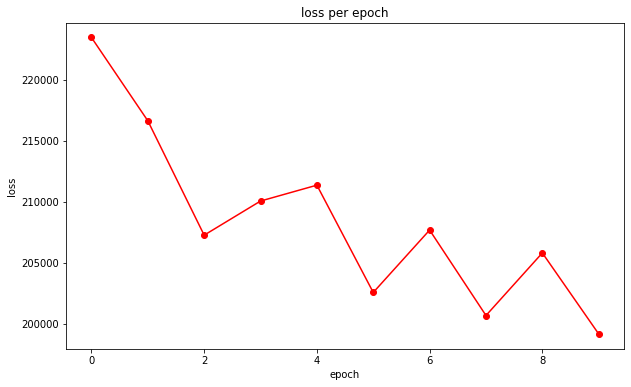

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
#print(loss_values)
plt.plot(loss_values,'-ro')
plt.title("loss per epoch")
plt.xlabel("epoch")
plt.ylabel("loss")

Text(0, 0.5, 'accuracy')

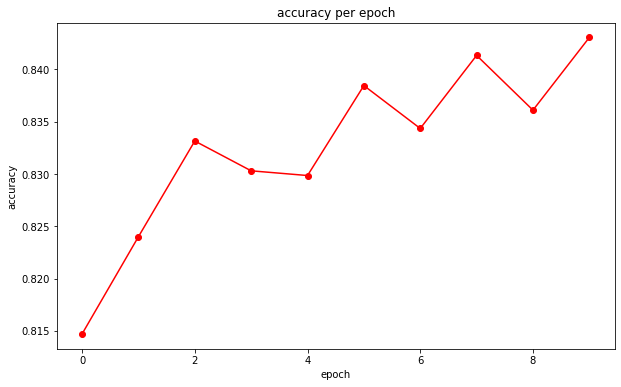

In [ ]:
plt.plot(accuracies,'-ro')
plt.title("accuracy per epoch")
plt.xlabel("epoch")
plt.ylabel("accuracy")